Mario Daniel Murcia Pinilla - Nicolas Andres Rodriguez lasso

Importamos librerías 

In [8]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.metrics import accuracy_score
from PIL import Image

%matplotlib inline

Importamos el data frame

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:

df=pd.DataFrame
df=pd.read_csv('/content/gdrive/My Drive/deep/bill_authentication.csv', encoding='utf-8')

Muestra los 10 primeros datos del Dataframe 

In [11]:
df.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


Describe y muestra cuantos datos nulos existen 


In [12]:
df.describe()
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Matriz De Correlación

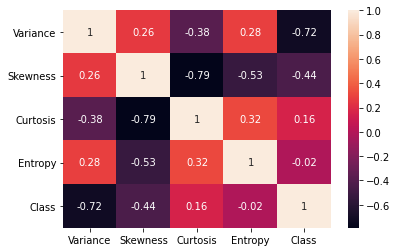

In [13]:
matriz = df.corr().round(2)
sns.heatmap(data=matriz, annot=True)

Mostramos los graficos de dispersión 

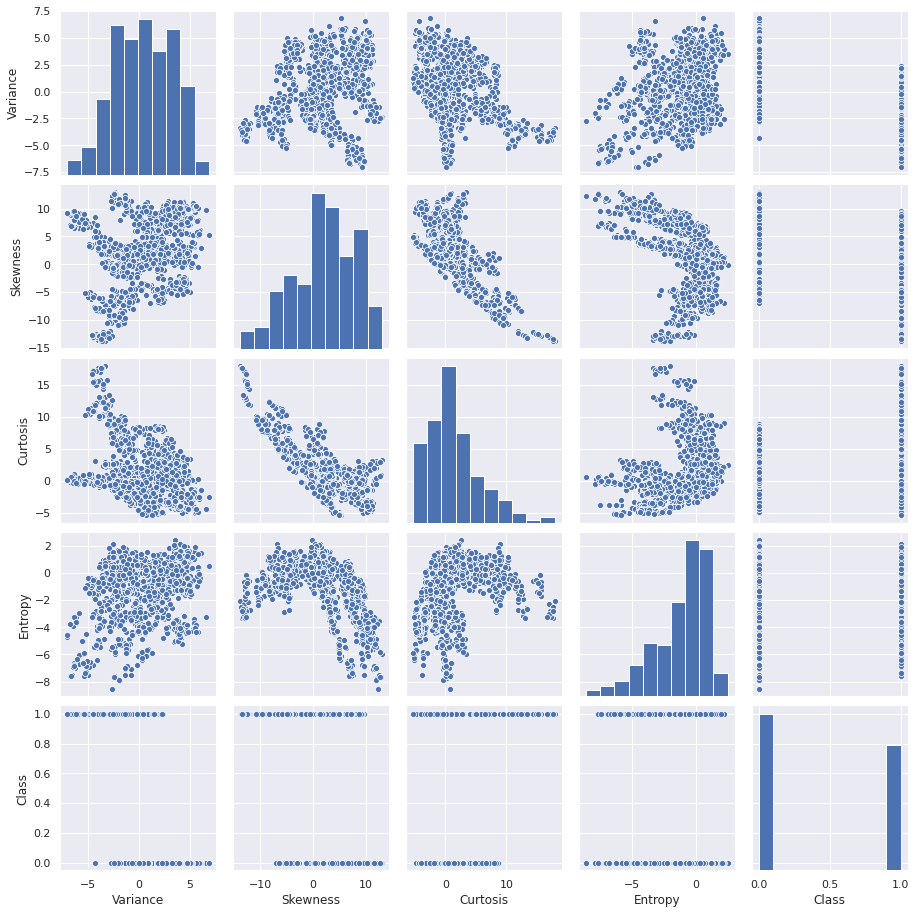

In [ ]:
sns.pairplot(df)         

Separación de datos de entrenamiento-prueba y entrenamiento del algoritmo

In [ ]:
Y= df['Class']
X = df.drop('Class', axis=1)

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
arbol = DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mostramos los 10 primeros valores mostrados en el test y luego los comparamos con nuestro modelo 

In [ ]:
print(X_test.iloc[0:10])
print(Y_test.iloc[0:10])
arbol.predict(X_test.iloc[0:10])

      Variance  Skewness  Curtosis  Entropy
738    0.92703    9.4318  -0.66263 -1.67280
1290   0.11032    1.9741  -3.36680 -0.65259
315    0.32920   -4.4552   4.57180 -0.98880
153    3.45910   11.1120  -4.20390 -5.09310
1349  -1.58510   -2.1562   1.70820  0.90170
1198  -1.78860   -6.3486   5.61540  0.42584
290    2.56780    3.5136   0.61406 -0.40691
579    1.15880    8.9331  -2.08070 -1.12720
545    4.10380   -4.8069   3.34910 -0.49225
593   -2.79140    1.7734   6.77560 -0.39915
738     0
1290    1
315     0
153     0
1349    1
1198    1
290     0
579     0
545     0
593     0
Name: Class, dtype: int64


array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
accuracy= arbol.score(X_test,Y_test)
print(accuracy)

0.92


Definimos variables y el nombre del grafico 


In [ ]:
lista_nombres= list(['Variance','Skewness','Curtosis','Entropy'])
dot_data = export_graphviz(arbol, class_names=lista_nombres)
grafico = graph_from_dot_data(dot_data)
grafico.write_png('arbol_iris.png')

True

Acá imprimimos las variables y su importancia 

In [ ]:
df_relevant = pd.DataFrame({'caracteristica':X_train.columns,'Importancia':arbol.feature_importances_})
df_relevant= df_relevant.sort_values('Importancia',ascending=False)
df_relevant.head()

,caracteristica,Importancia
0,Variance,0.724138
1,Skewness,0.196793
2,Curtosis,0.079069
3,Entropy,0.000000


Entrenamiento por  Árbol Probabilidades 

In [ ]:
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
#calcular la exactitud
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
#overfitting 
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.9434822242479489
Accuracy of test: %0.92
Accuracy Global %0.92





1.   Resultados estadísticos del modelo 
*   Mostrar grafico de árbol 




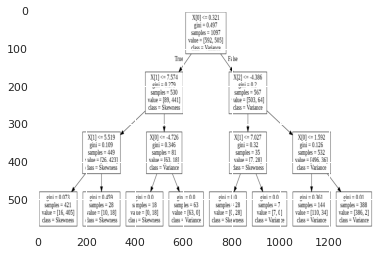

In [ ]:
img = plt.imread('/content/arbol_iris.png')
plt.imshow(img,aspect='auto')